
==== Random Forest ====
Test Doğruluk Oranı: % 83.0
Confusion Matrix:
[[90 15]
 [19 76]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

     Sınıf 0       0.83      0.86      0.84       105
     Sınıf 1       0.84      0.80      0.82        95

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



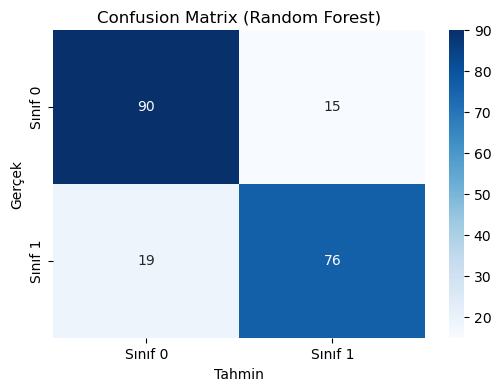

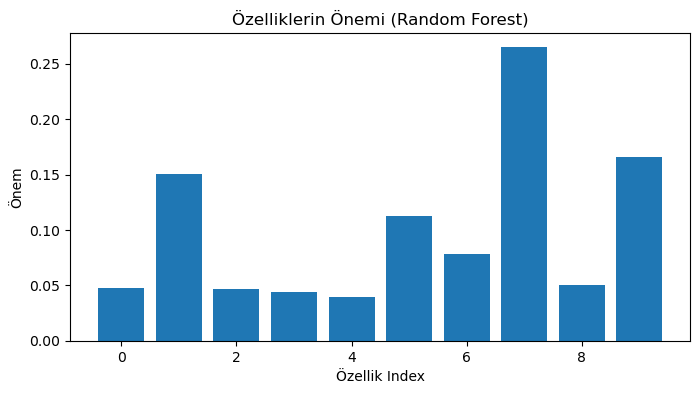


==== AdaBoost ====
Test Doğruluk Oranı: % 74.0
Confusion Matrix:
[[70 35]
 [17 78]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

     Sınıf 0       0.80      0.67      0.73       105
     Sınıf 1       0.69      0.82      0.75        95

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



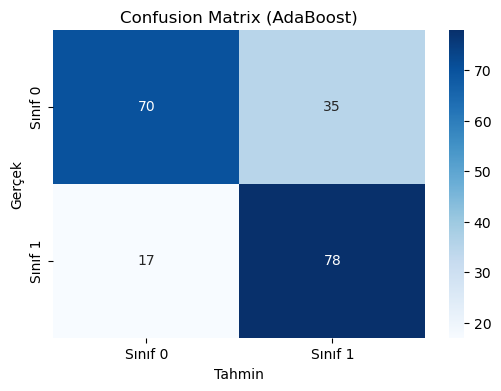

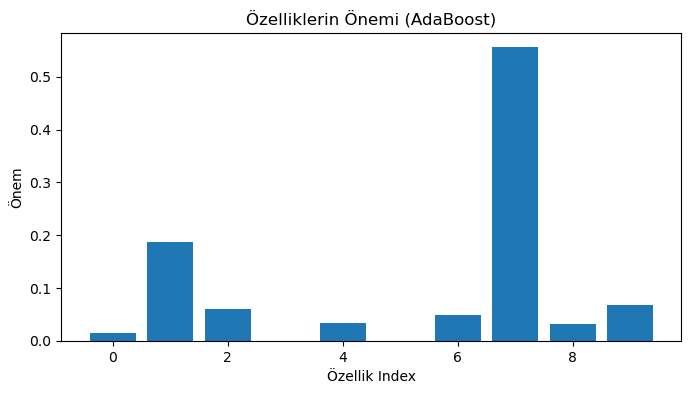


==== XGBoost ====
Test Doğruluk Oranı: % 83.0
Confusion Matrix:
[[89 16]
 [18 77]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

     Sınıf 0       0.83      0.85      0.84       105
     Sınıf 1       0.83      0.81      0.82        95

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



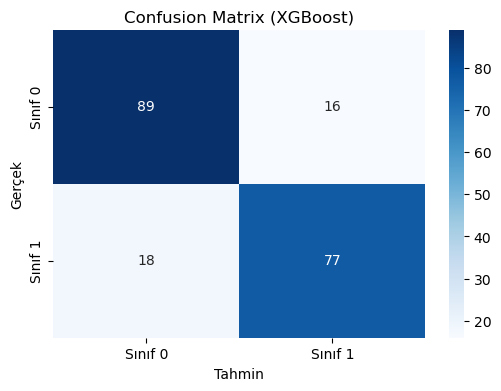

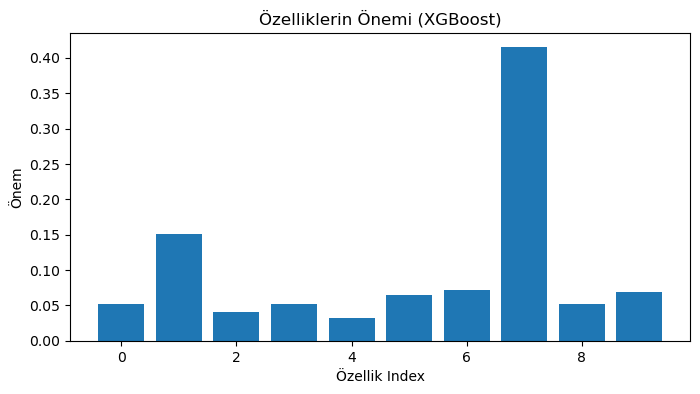

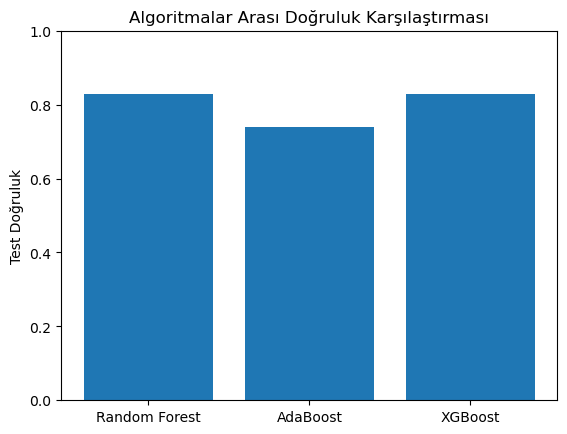

In [2]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
# XGBoost'u ekle
from xgboost import XGBClassifier

# 1. Zor, gürültülü bir veri seti üret
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    n_redundant=2,
    n_classes=2,
    n_clusters_per_class=2,
    flip_y=0.15,
    class_sep=0.8,
    random_state=42
)

# 2. Eğitim/test ayır
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. MODELLER
modeller = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

sonuclar = {}

for isim, model in modeller.items():
    model.fit(X_egitim, y_egitim)
    y_tahmin = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_tahmin)
    cm = confusion_matrix(y_test, y_tahmin)
    rapor = classification_report(y_test, y_tahmin, target_names=['Sınıf 0', 'Sınıf 1'])
    print(f"\n==== {isim} ====")
    print("Test Doğruluk Oranı: %", round(dogruluk * 100, 2))
    print("Confusion Matrix:")
    print(cm)
    print("Sınıflandırma Raporu:\n", rapor)
    # Grafik çiz
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Sınıf 0', 'Sınıf 1'], yticklabels=['Sınıf 0', 'Sınıf 1'])
    plt.xlabel("Tahmin")
    plt.ylabel("Gerçek")
    plt.title(f"Confusion Matrix ({isim})")
    plt.show()
    # Özellik önemi
    if hasattr(model, "feature_importances_"):
        plt.figure(figsize=(8,4))
        plt.bar(range(X.shape[1]), model.feature_importances_)
        plt.xlabel("Özellik Index")
        plt.ylabel("Önem")
        plt.title(f"Özelliklerin Önemi ({isim})")
        plt.show()
    sonuclar[isim] = dogruluk

# 4. Farkları görselleştir
plt.bar(sonuclar.keys(), sonuclar.values())
plt.ylabel("Test Doğruluk")
plt.title("Algoritmalar Arası Doğruluk Karşılaştırması")
plt.ylim(0, 1)
plt.show()
